# 점진적 학습 알고리즘 : 확률적 경사 하강법
![](./확률적경사하강법.PNG)

## 확률적 경사 하강법
- 손실 함수 : 어떤 문제에서 머닝러신 알고리즘이 얼마나 엉터리인지 측정하는 기준
- 경사 하강법에서 내려오는 산이 손실 함수
- 이진 분류에서 사용하는 손실 함수 : 로지스틱 손실 함수 또는 이진 크로스엔트로피 손실 함수
- 다중 분류에서 사용하는 손실 함수 : 크로스엔트로피 손실 함수
- -log(예측확률) 또는 -log(1-예측확률)을 사용
- 손실 함수는 우리가 만들지 않아도 됨
- scikit-learn의 LogisticRegression이 로지스틱 회귀를 위한 클래스
- predict_proba() 메서드는 예측 확률을 반환
  - 이진 분류 : 샘플마다 음성 클래스와 양성 클래스에 대한 확률 반환
  - 다중 분류 : 샘플마다 모든 클래스에 대한 확률 반환
- decision_function()은 모델이 학습한 선형 방정식의 출력을 반환
  - 이진 분류 : 양성 클래스의 선형 방정식
  - 다중 분류 : 각 클래스마다 선형 방정식

# 학교 실습 2 : 확률적 경사 하강법(Stochasitc Gradient Descent)
- 훈련한 데이터를 점진적으로 학습하는 방법
- fish_csv_data 사용
- 사이킷 런의 대표적인 확률적 경사하강법을 제공하는 분류 클래스인 SGDClassifier 사용
- 손실 함수 : 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준
- 파일 이름 : StochasticGradientDescent.ipynb

## 데이터 전처리

In [2]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data') #데이타 읽어옴

In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy() #Species열은 타깃 데이터

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 확률적 경사 하강법 : SGDClassifier

In [6]:
from sklearn.linear_model import SGDClassifier

In [9]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) 
#손실함수는 로지스틱 손실함수, 수행할 에포크 횟수=10
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))  #훈련세트와 테스트 세트의 정확도 출력
print(sc.score(test_scaled, test_target))    #warning이 뜬다면 max_iter의 숫자를 늘려준다

0.773109243697479
0.775


C:\Users\joey0\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [10]:
sc.partial_fit(train_scaled, train_target)  
#앞의 정확도가 낮으므로 추가로 더 훈련, 이어서 훈련할 때는 partial_fit() 사용, 호출할 때마다 1 에포크씩 이어서 훈련

print(sc.score(train_scaled, train_target))   #정확도 출력
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


### 확률적 경사 하강법 : 에포크와 과대/과소 적합

In [11]:
import numpy as np

sc = SGDClassifier(loss = 'log', random_state=42)

train_score = [] #train_score와 test_score 점수 기록
test_score = []

classes = np.unique(train_target)

In [12]:
for _ in range(0,300): #300번의 에포크 동안 훈련
  sc.partial_fit(train_scaled, train_target, classes=classes)

  train_score.append(sc.score(train_scaled, train_target))
  train_score.append(sc.score(test_scaled, test_target))

- 과대 적합(overfitting) : 모델의 훈련 세트 점수가 테스트 세트 점수보다 훨씬 높을 경우
- 과소 적합(underfitting) : 모델의 훈련 세트 점수와 테스트 세트 점수가 동일하게 낮거나 테스트 세트의 성능이 오히려 더 높을 경우

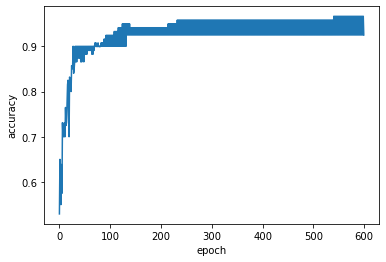

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()  
#100번 이후에는 훈련세트와 테스트 세트의 간격이 벌어지고있고 정확도 차이가 없다 -> 적합한 반복횟수는 100번정도

### 확률적 경사 하강법 : 100번 반복

In [14]:
sc = SGDClassifier(loss = 'log', max_iter=100, tol=None, random_state=42) 
#SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.
#tol 매개변수에서 향상될 최소값을 지정, tol=None이면 자동으로 멈추지 말라는 의미

sc.fit(train_scaled, train_target)                                        

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [16]:
sc = SGDClassifier(loss = 'hinge', max_iter=100, tol=None, random_state=42) 
#손실 함수를 hinge로 바꿔서 적용
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


## 정리
- 확률적 경사 하강법 : 훈련 세트에서 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
  - 미니배치 경사 하강법 : 샘플을 하나씩 꺼내지 않고 여러 개 사용하면
  - 배치 경사 하강법 : 한 번에 전체 샘플을 사용하면
- 손실 함수 : 확률적 경사하강법이 최적화할 대상
  - 이진 분류에는 로지스틱 회귀 손실 함수
  - 다중 분류에는 크로스 엔트로피 손실함수
  - 회귀 문제에는 평균 제곱 오차(MSE) 손실 함수 사용
- 에포크 : 확률적 경사 하강법에서 전체 샘플을 모두 사용하는 것을 한 에포크 라고 함